In [2]:
import pandas as pd
import datetime as dt
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import io

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CombinedData.csv to CombinedData.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['CombinedData.csv']))

In [4]:
df

,date,lat,lon,parameters,rfh_avg,vim_avg,month,year,rh_anoms,t_abs
0,2018-06-14,6.47657,2.63914,0,60.893739,51.9983,6,2018,-1.204607,26.391665
1,2018-06-14,6.47657,2.63914,41,60.893739,51.9983,6,2018,-1.204607,26.391665
2,2018-06-14,6.47657,2.63914,36,60.893739,51.9983,6,2018,-1.204607,26.391665
3,2018-06-15,6.48287,2.59392,42,60.893739,51.9983,6,2018,-1.204607,26.391665
4,2018-07-02,6.48289,2.62829,0,56.126466,53.8446,7,2018,0.094843,25.458334
...,...,...,...,...,...,...,...,...,...,...
1197,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000
1198,2022-07-05,6.41567,2.34801,0,56.126466,53.8446,7,2022,-1.998014,25.350000
1199,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000
1200,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000


In [59]:
df = df.drop(columns=['Unnamed: 0', 'lat', 'lon'])

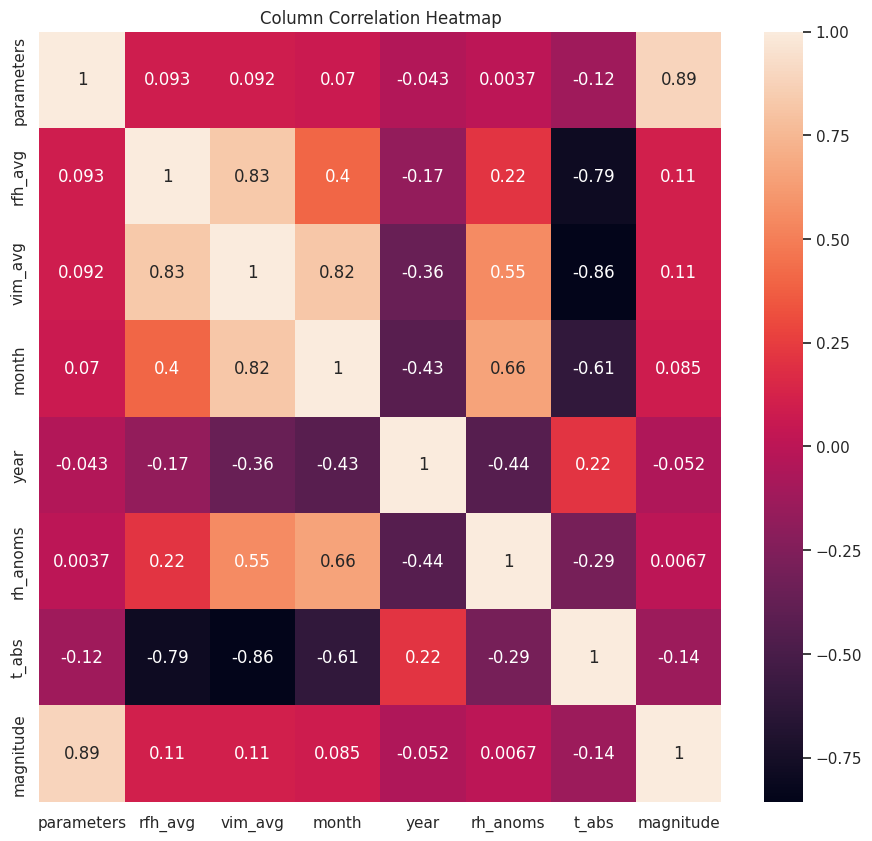

In [60]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title ("Column Correlation Heatmap")
plt.show()

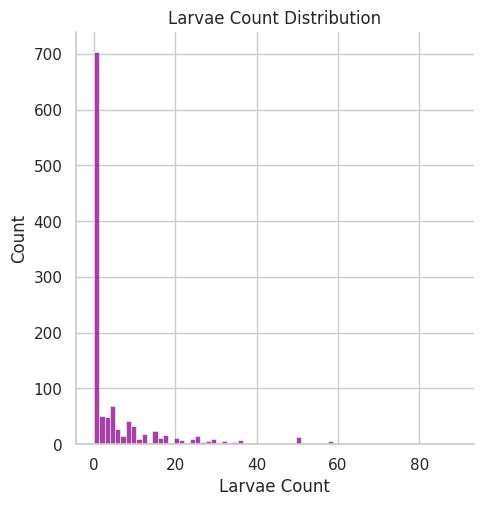

In [62]:
sns.displot(df['parameters'], color = 'darkmagenta')
plt.title("Larvae Count Distribution")
plt.xlabel('Larvae Count')
plt.show()

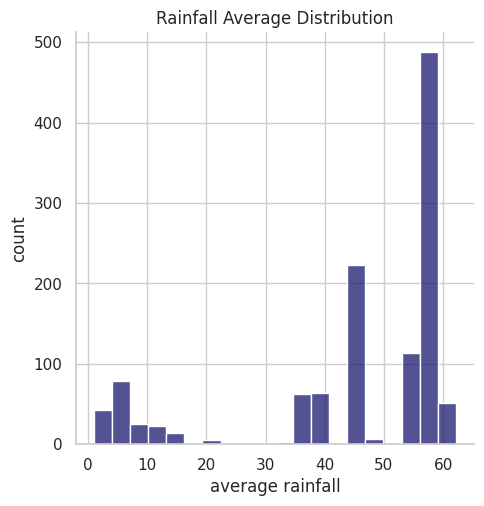

In [67]:
sns.displot(df['rfh_avg'], color = 'midnightblue')
plt.title("Rainfall Average Distribution")
plt.xlabel('average rainfall')
plt.ylabel('count')
plt.show()

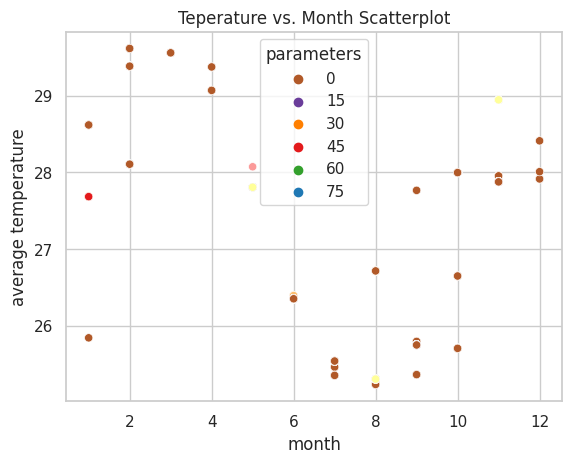

In [74]:
sns.scatterplot(data=df, x='month', y='t_abs', hue='parameters', palette='Paired_r')
plt.title("Teperature vs. Month Scatterplot")
plt.xlabel('month')
plt.ylabel('average temperature')
plt.show()

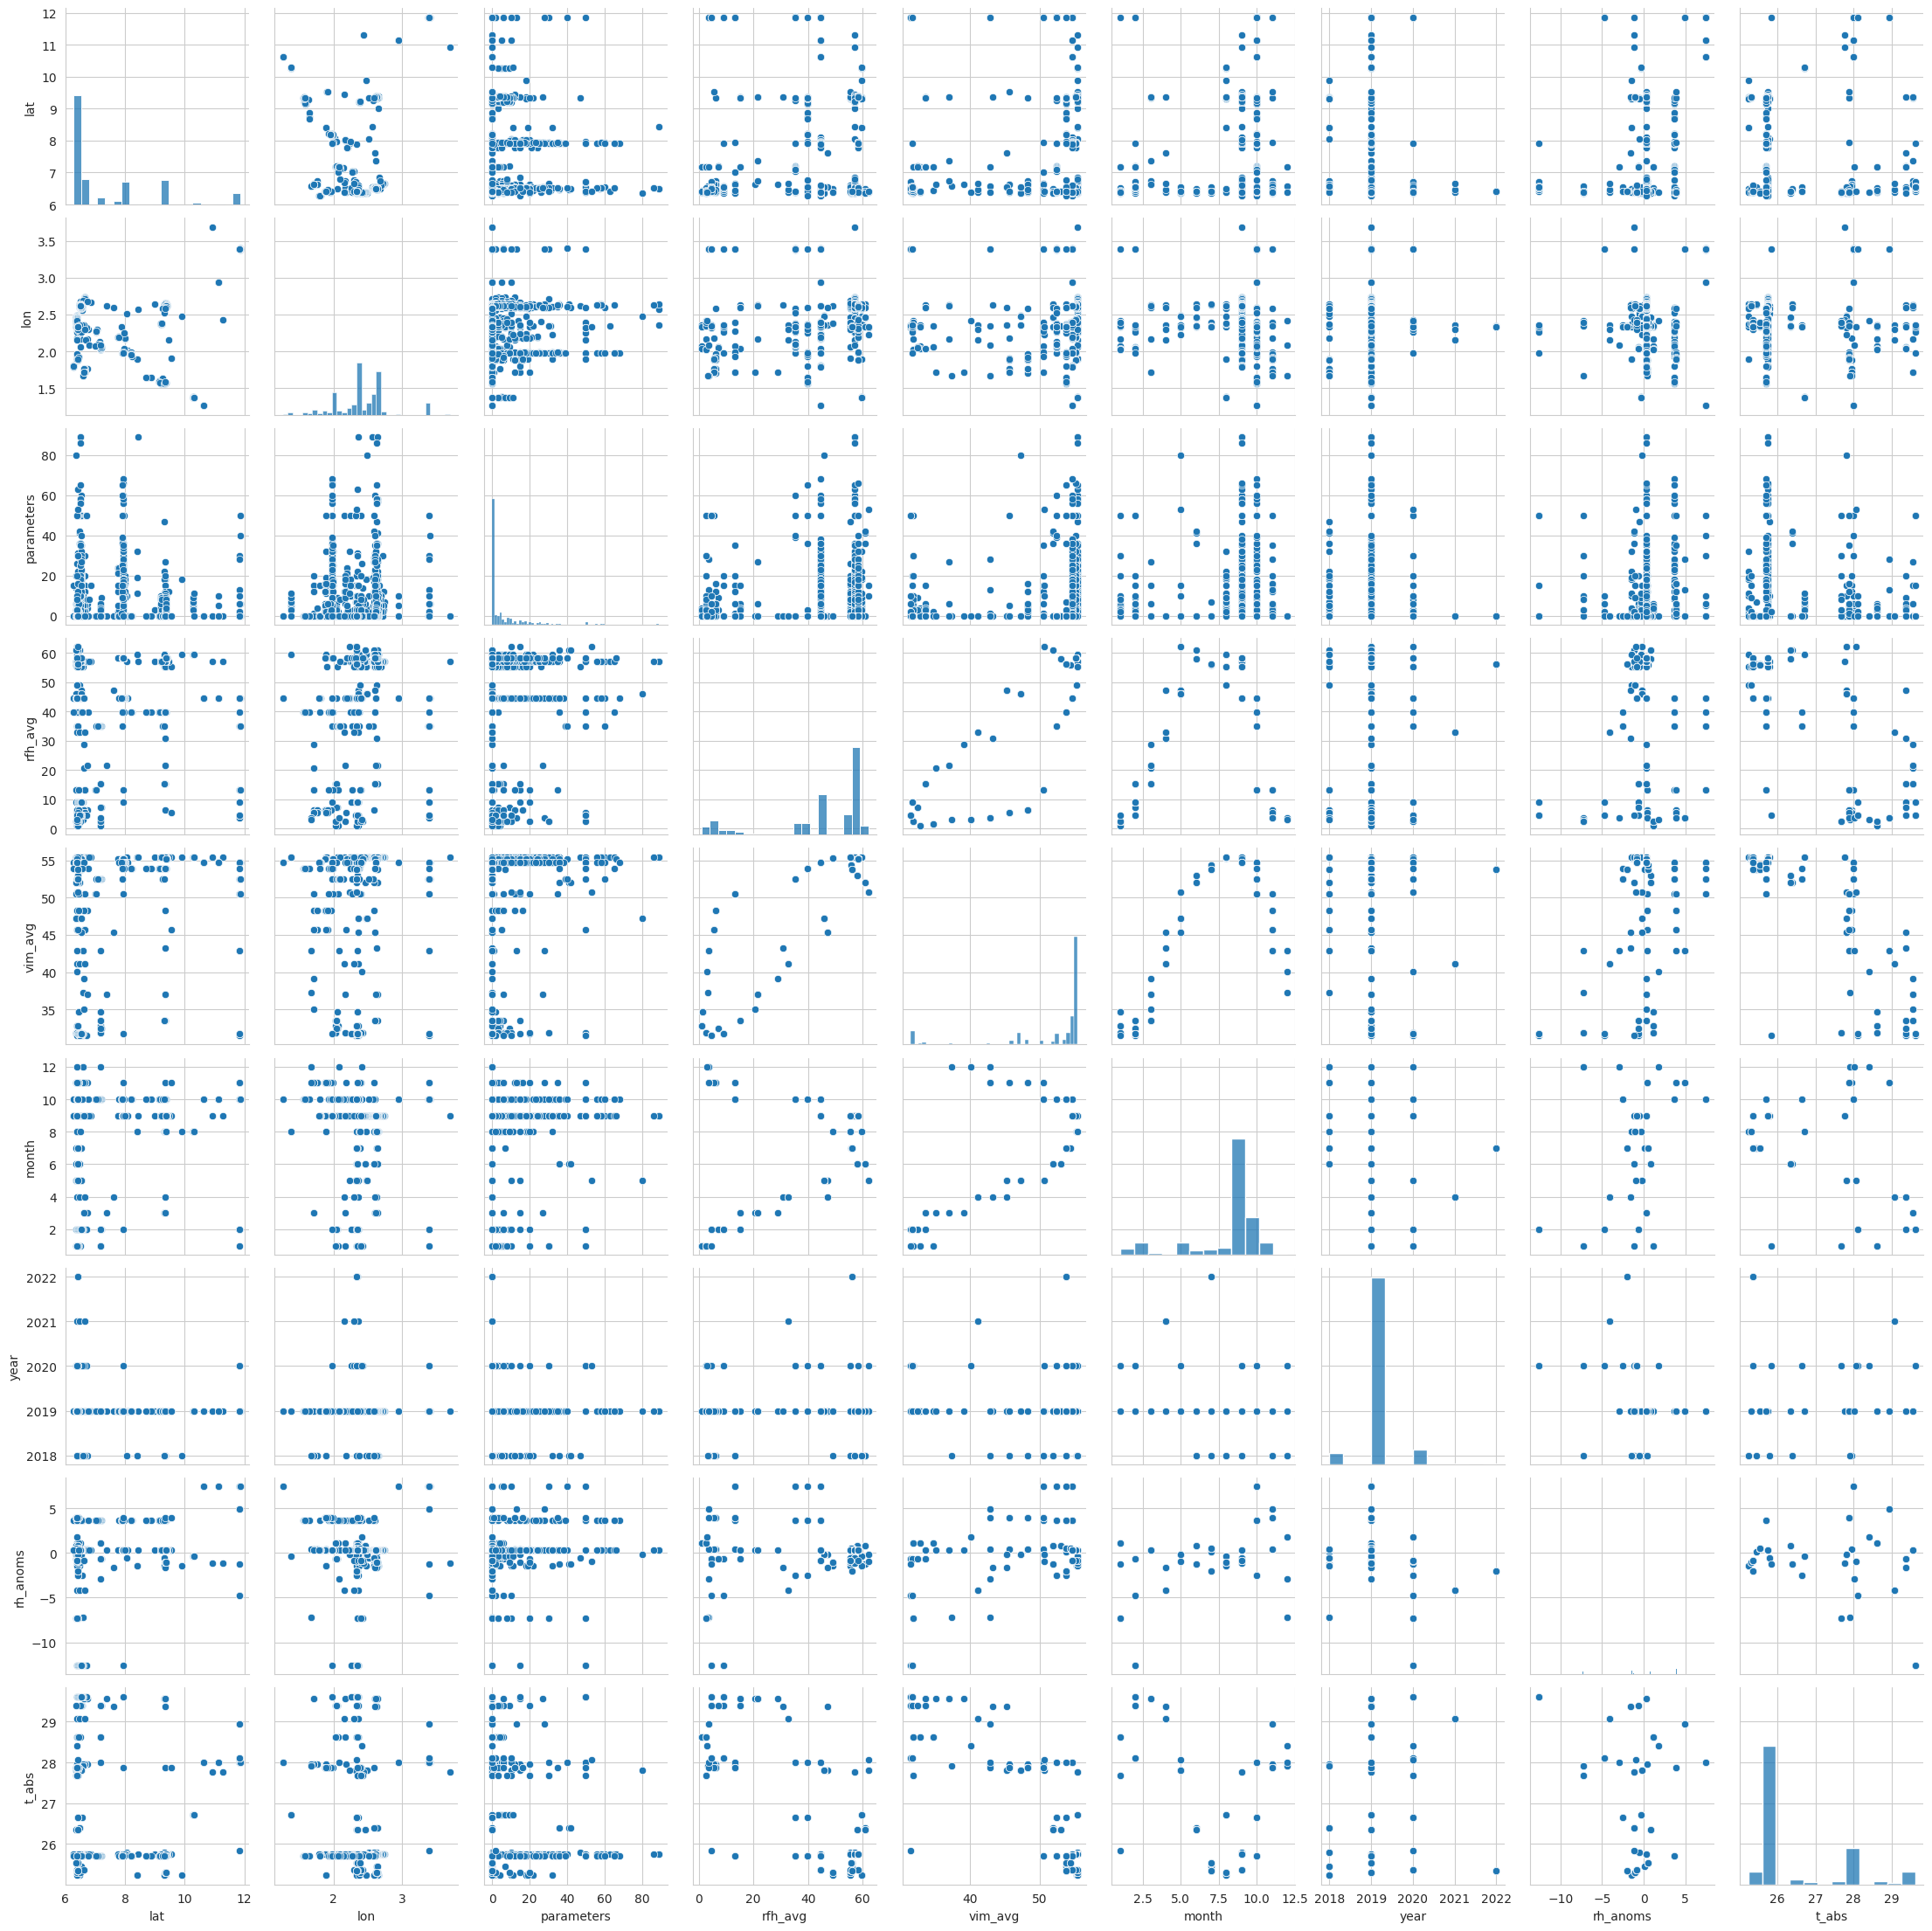

In [15]:
sns.pairplot(df)

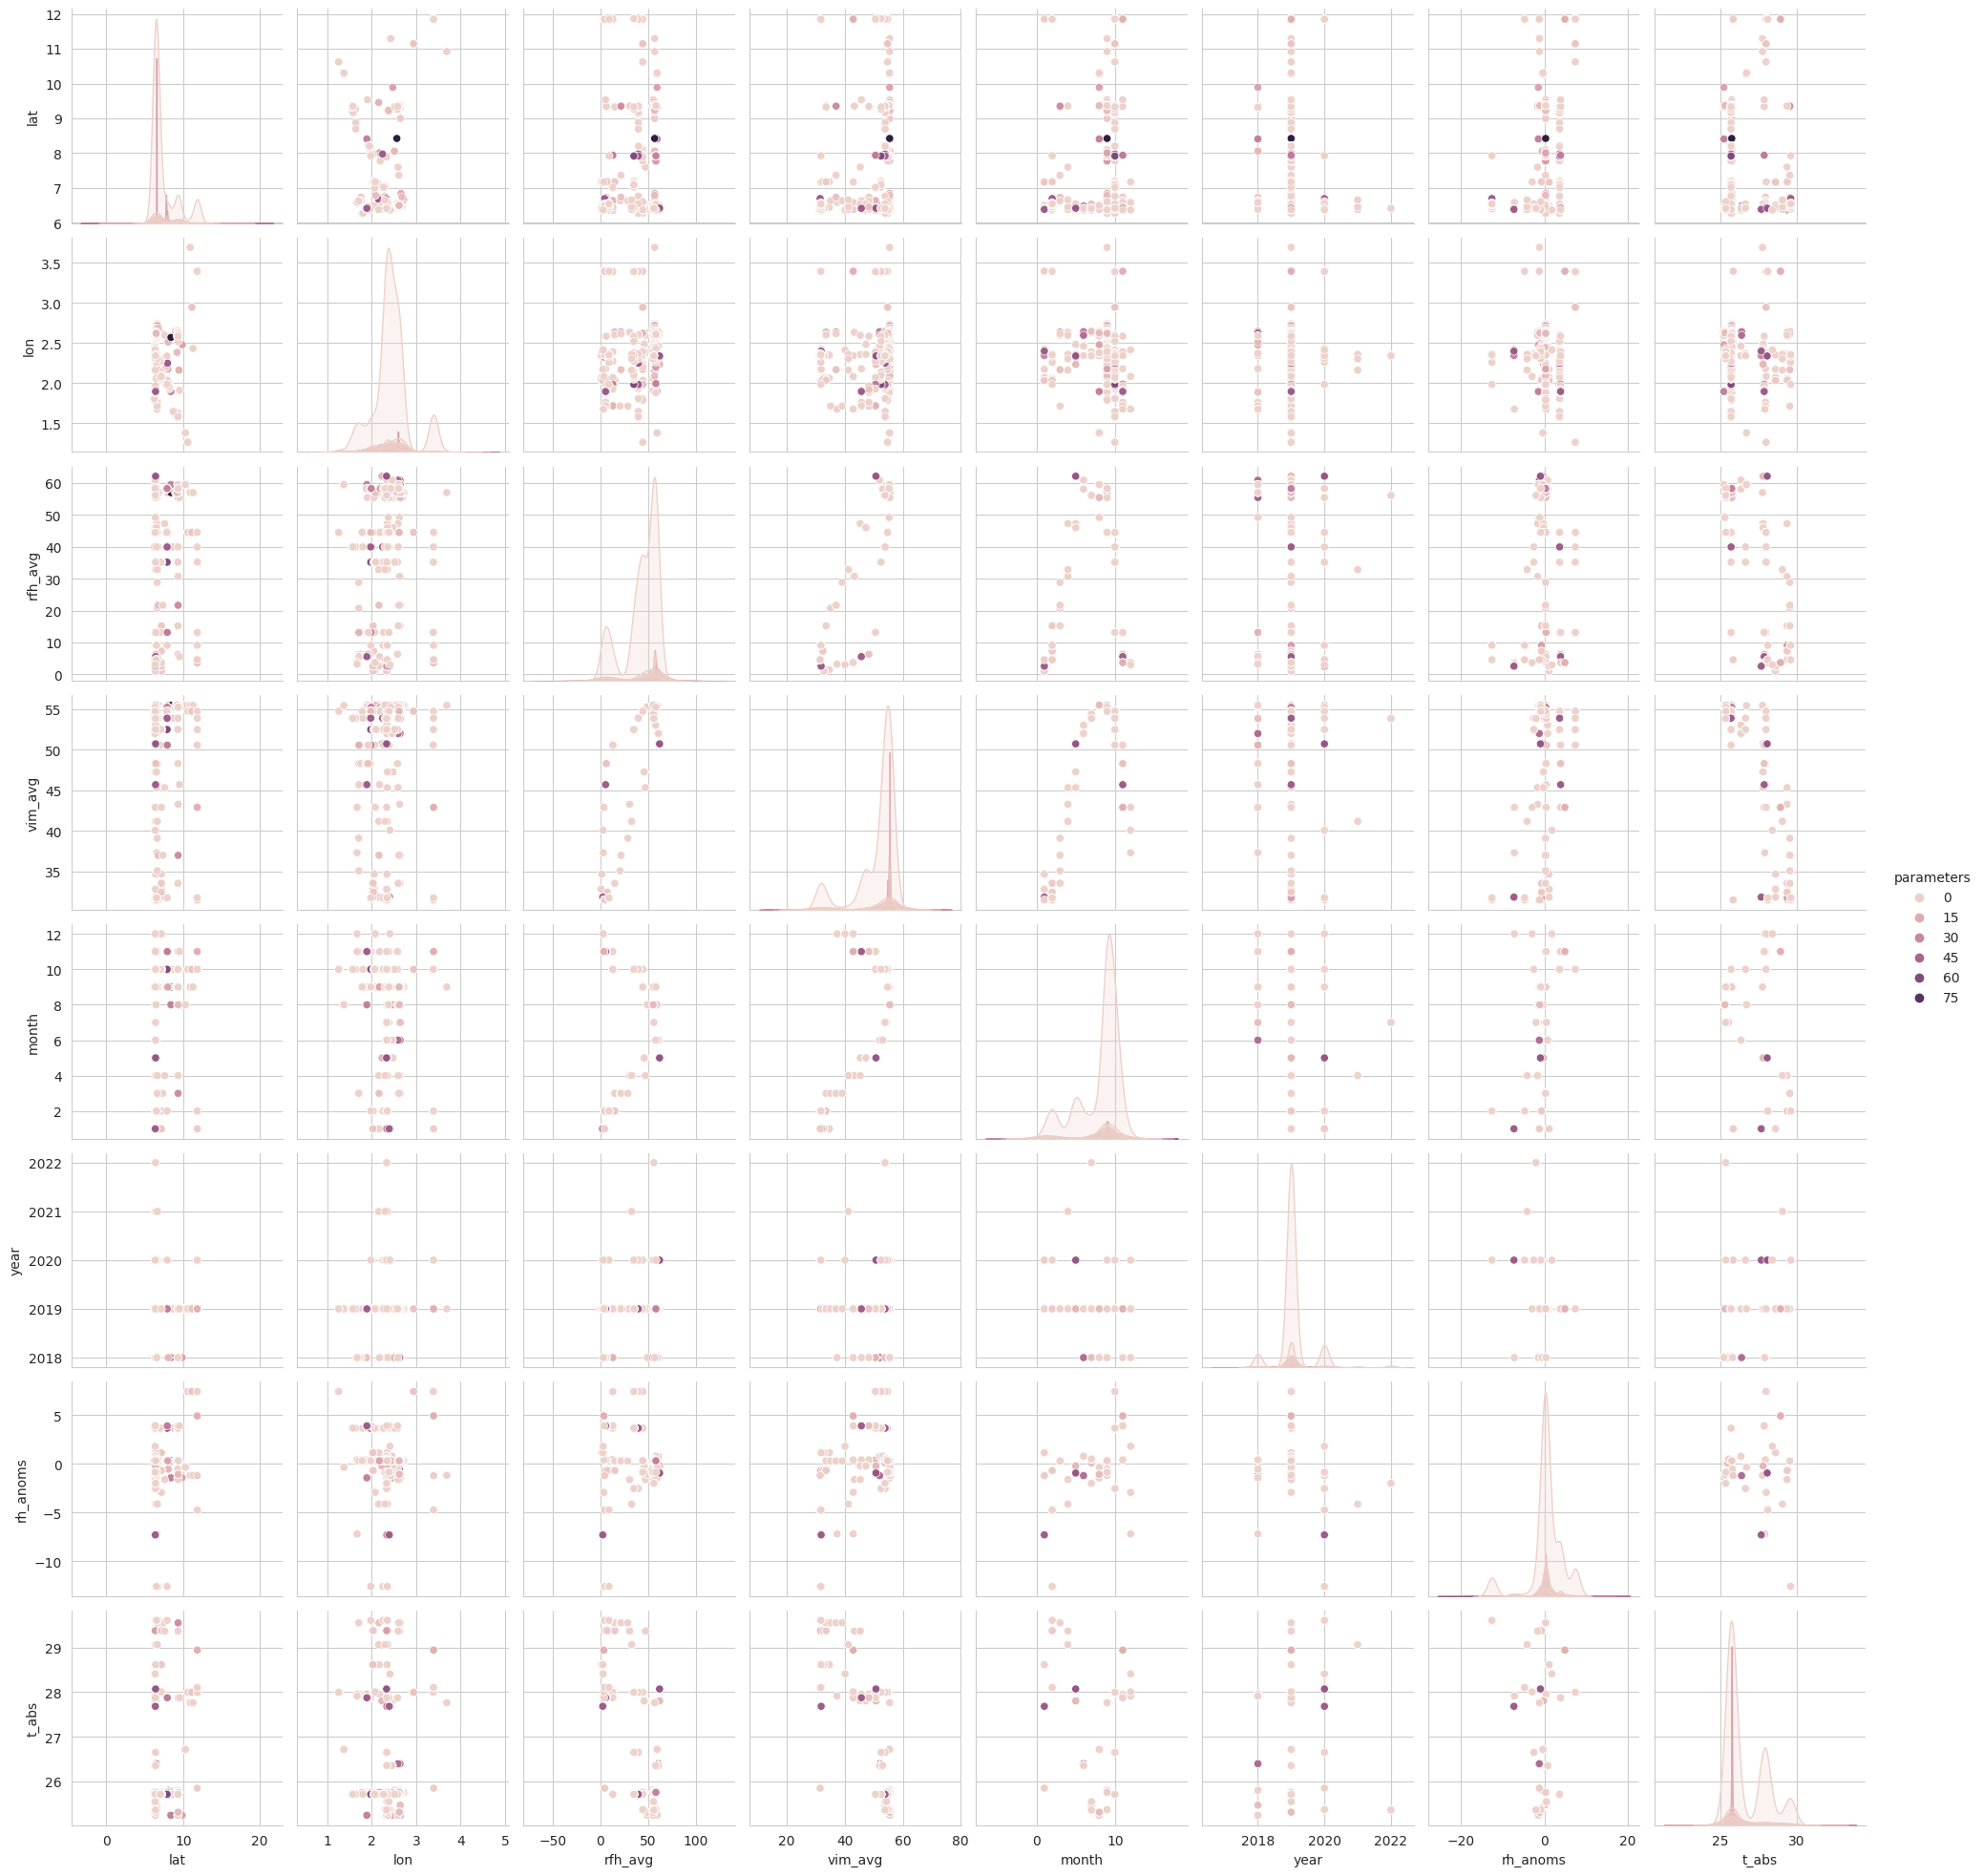

In [7]:
sns.set_palette("pastel")
sns.pairplot(df, hue = 'parameters')

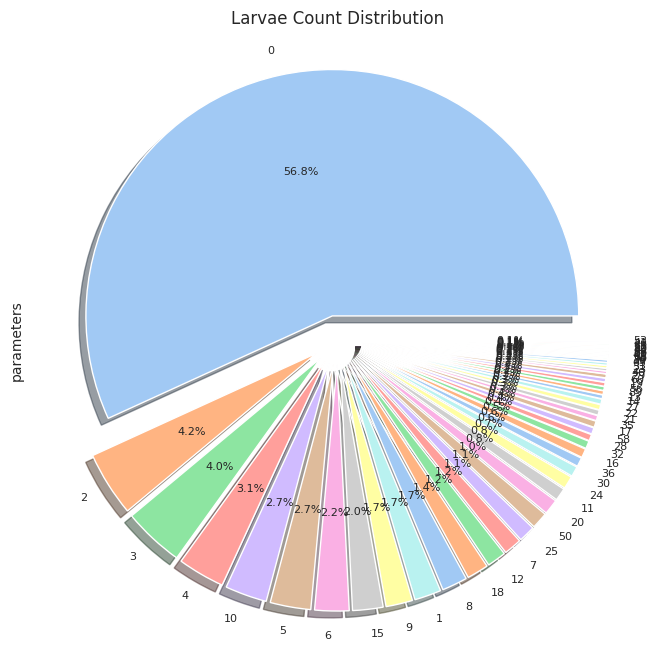

In [22]:
plt.figure(figsize=(8, 8))
value_counts = df['parameters'].value_counts()
explode = [0.1] * len(value_counts)
value_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 8})
plt.title("Larvae Count Distribution")
plt.show()

##Labeled Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving labeled_combined_data.csv to labeled_combined_data.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['labeled_combined_data.csv']))

In [26]:
df

,Unnamed: 0,date,lat,lon,parameters,rfh_avg,vim_avg,month,year,rh_anoms,t_abs,magnitude
0,0,2018-06-14,6.47657,2.63914,0,60.893739,51.9983,6,2018,-1.204607,26.391665,0
1,1,2018-06-14,6.47657,2.63914,41,60.893739,51.9983,6,2018,-1.204607,26.391665,2
2,2,2018-06-14,6.47657,2.63914,36,60.893739,51.9983,6,2018,-1.204607,26.391665,2
3,3,2018-06-15,6.48287,2.59392,42,60.893739,51.9983,6,2018,-1.204607,26.391665,2
4,4,2018-07-02,6.48289,2.62829,0,56.126466,53.8446,7,2018,0.094843,25.458334,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1197,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000,0
1198,1198,2022-07-05,6.41567,2.34801,0,56.126466,53.8446,7,2022,-1.998014,25.350000,0
1199,1199,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000,0
1200,1200,2022-07-05,6.41566,2.33807,0,56.126466,53.8446,7,2022,-1.998014,25.350000,0


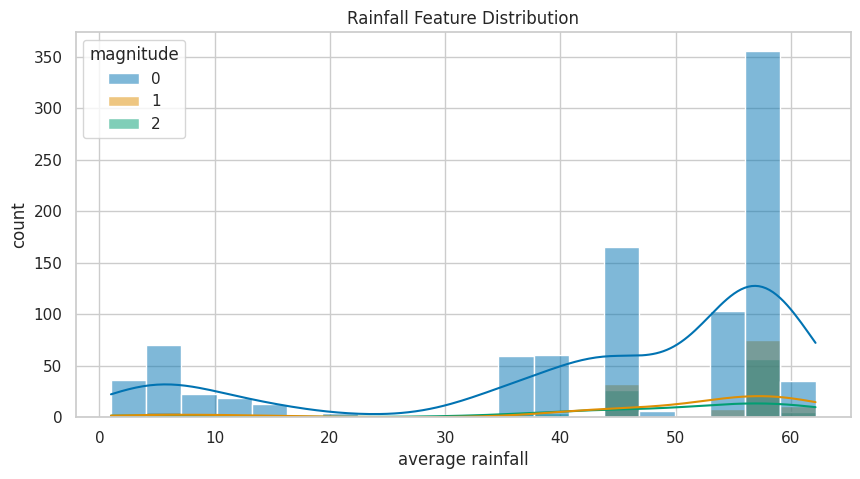

In [73]:
plt.figure(figsize = (10,5))
sns.histplot(x = df["rfh_avg"],hue="magnitude",data = df, kde=True,palette= "colorblind")
plt.xlabel('average rainfall')
plt.ylabel('count')
#plt.legend(title='Larvae Magnitude')
plt.title("Rainfall Feature Distribution");

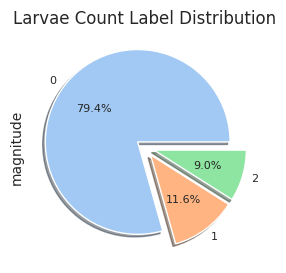

In [31]:
plt.figure(figsize=(3, 3))
value_counts = df['magnitude'].value_counts()
explode = [0.1] * len(value_counts)
value_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 8})
plt.title("Larvae Count Label Distribution")
plt.show()

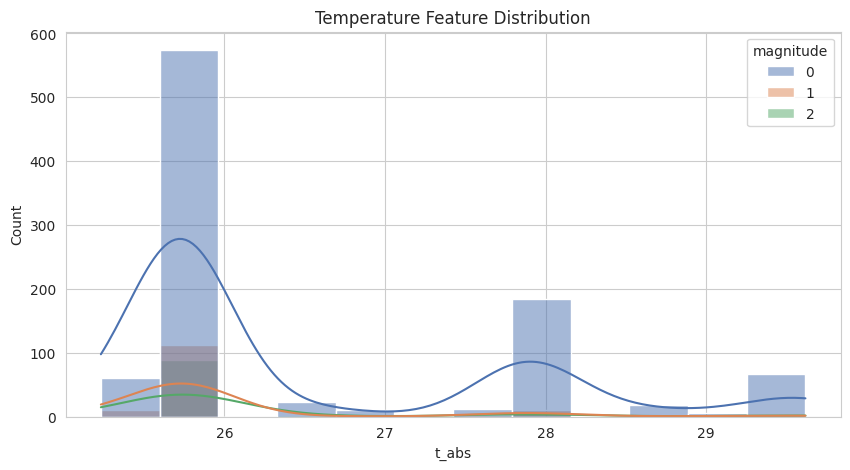

In [33]:
plt.figure(figsize = (10,5))
sns.histplot(x = df["t_abs"],hue="magnitude",data = df, kde=True,palette= "deep")
plt.title("Temperature Feature Distribution");

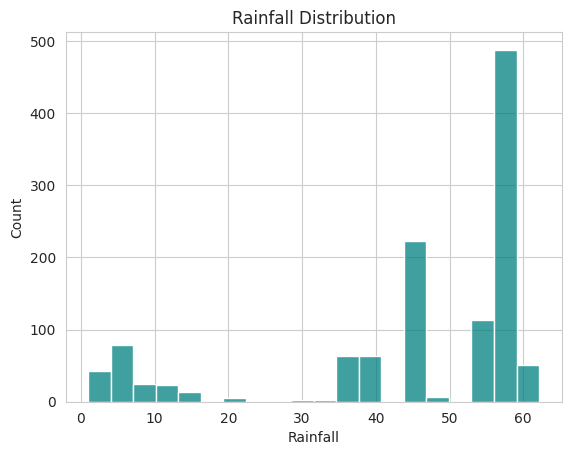

In [38]:
sns.histplot(data=df, x='rfh_avg', kde=False, color='teal')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.title('Rainfall Distribution')
plt.show()

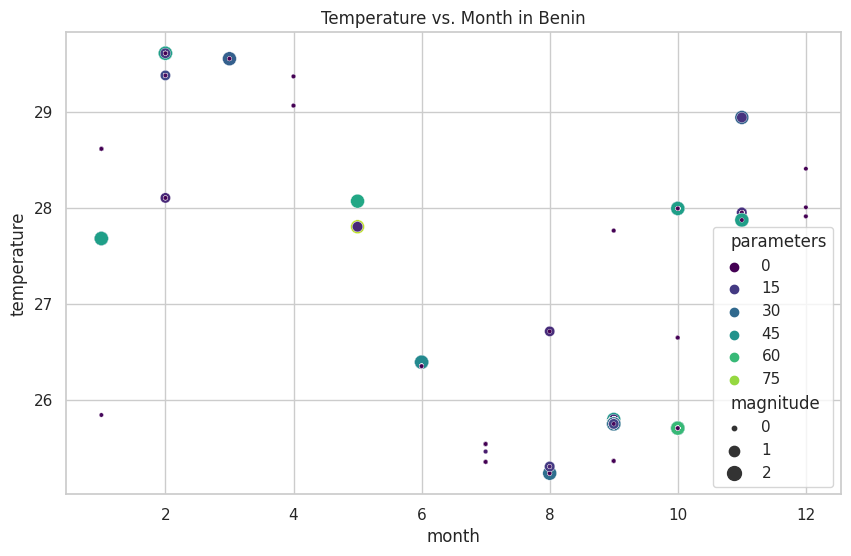

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='month', y='t_abs', hue='parameters', palette='viridis', size='magnitude', sizes=(10, 100))
plt.title('Temperature vs. Month in Benin')
plt.xlabel('month')
plt.ylabel('temperature')
#plt.legend(title='Parameters')
plt.show()

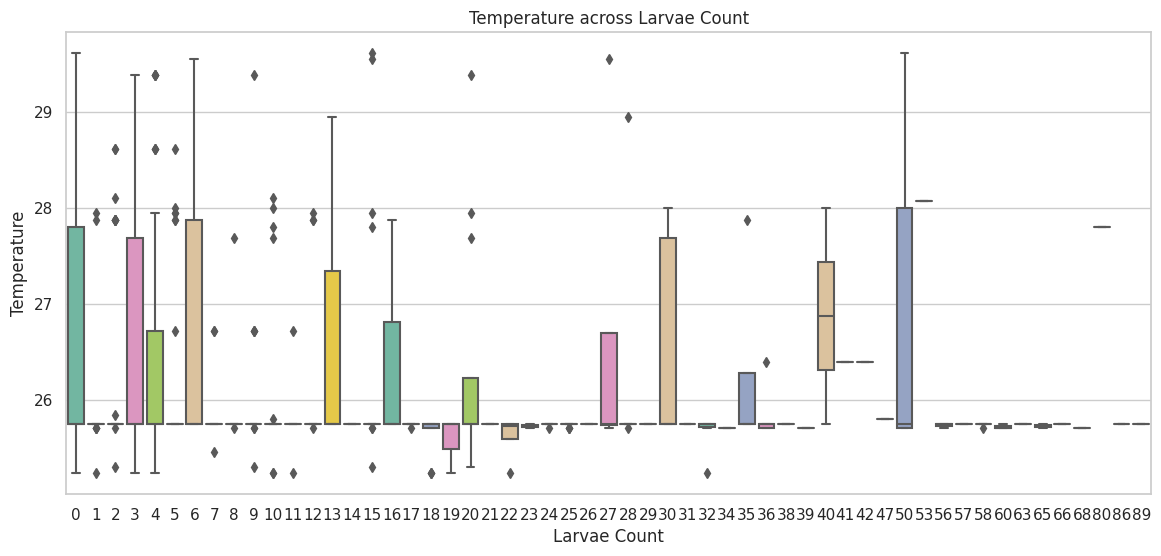

In [56]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='parameters', y='t_abs', palette='Set2')
plt.title('Temperature across Larvae Count')
plt.xlabel('Larvae Count')
plt.ylabel('Temperature')
plt.show()

<ipython-input-47-0171476fb815>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='rfh_avg', ci=None, palette='muted')


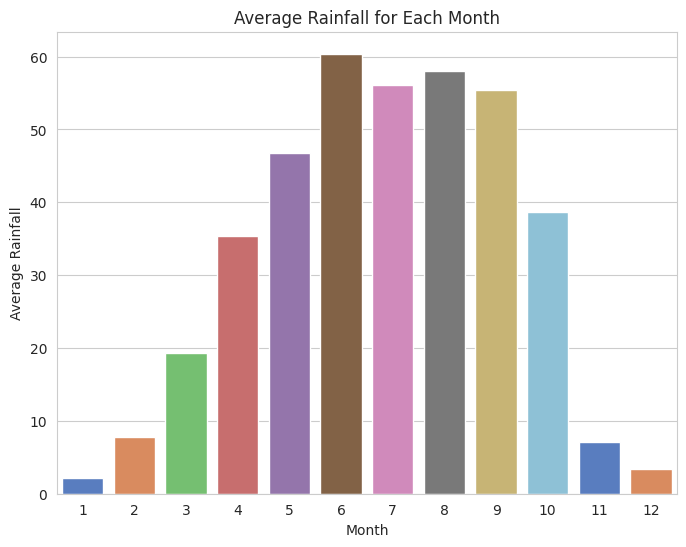

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='month', y='rfh_avg', ci=None, palette='muted')
plt.title('Average Rainfall for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.show()

<ipython-input-5-9664494bc49b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='t_abs', ci=None, palette='muted')


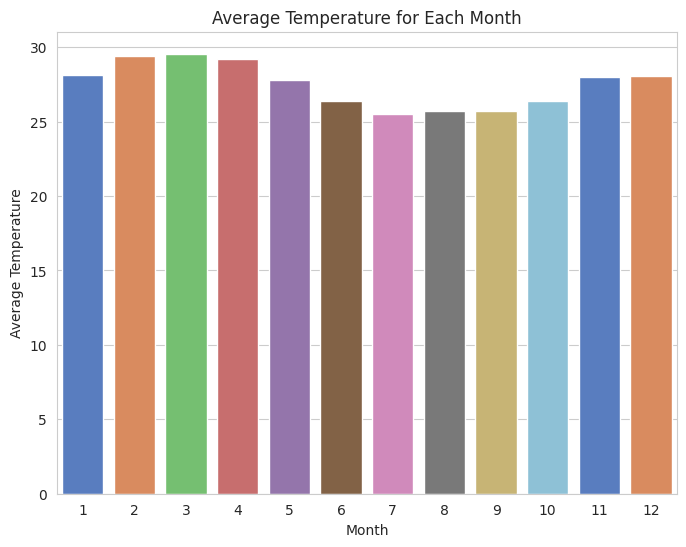

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='month', y='t_abs', ci=None, palette='muted')
plt.title('Average Temperature for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

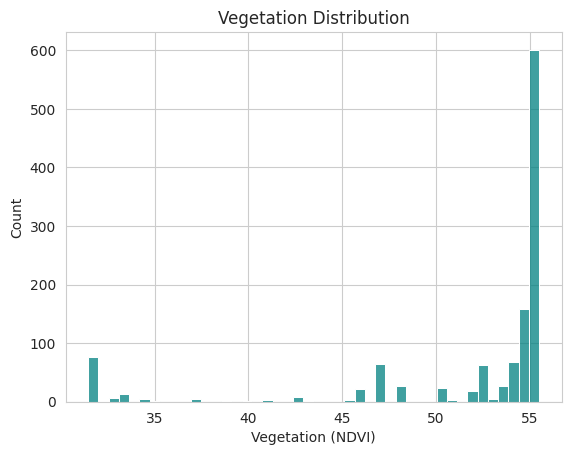

In [6]:
sns.histplot(data=df, x='vim_avg', kde=False, color='teal')
plt.xlabel('Vegetation (NDVI)')
plt.ylabel('Count')
plt.title('Vegetation Distribution')
plt.show()

<ipython-input-16-13622a6a996f>:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='month', y='rh_anoms', alpha=0.8, hue = 'magnitude', palette=sns.color_palette("deep", desat=0.5))


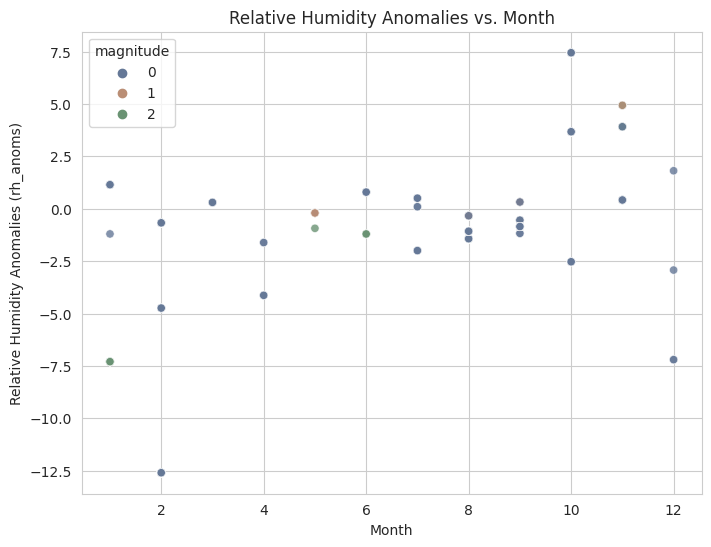

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='month', y='rh_anoms', alpha=0.8, hue = 'magnitude', palette=sns.color_palette("deep", desat=0.5))
plt.xlabel('Month')
plt.ylabel('Relative Humidity Anomalies (rh_anoms)')
plt.title('Relative Humidity Anomalies vs. Month')
plt.show()